In [77]:
import numpy as np
import pandas as pd

In [78]:
df = pd.read_csv('spam.csv')

In [79]:
df.sample(5)

,Category,Message
3736,ham,"It‘s £6 to get in, is that ok?"
2988,ham,"I'm there and I can see you, but you can't see..."
2653,ham,No need for the drug anymore.
2294,ham,Hello. Damn this christmas thing. I think i ha...
219,ham,I have to take exam with march 3


In [80]:
df.shape

(5572, 2)

In [81]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [84]:
df.sample(5)

,Category,Message
543,ham,But am going to college pa. What to do. are el...
3544,ham,I'm e person who's doing e sms survey...
136,ham,I only haf msn. It's yijue@hotmail.com
5248,ham,U come n search tat vid..not finishd..
5098,spam,TheMob>Hit the link to get a premium Pink Pant...


In [85]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,Category,Message
4781,ham,Sen told that he is going to join his uncle fi...
399,ham,"Good evening Sir, Al Salam Wahleykkum.sharing ..."
5285,spam,URGENT! You have won a 1 week FREE membership ...
3160,ham,Are you up for the challenge? I know i am :)
127,ham,"Just so that you know,yetunde hasn't sent mone..."


In [86]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [93]:
df['Category'] = encoder.fit_transform(df['Message'])

In [94]:
df.head()

,Category,Message
0,1080,"Go until jurong point, crazy.. Available only ..."
1,3126,Ok lar... Joking wif u oni...
2,999,Free entry in 2 a wkly comp to win FA Cup fina...
3,4121,U dun say so early hor... U c already then say...
4,2781,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
# missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [96]:
# check for duplicate values
df.duplicated().sum()

415

In [97]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [98]:
df.duplicated().sum()

0

In [99]:
df.shape

(5157, 2)

## 2.EDA

In [100]:
df.head()

,Category,Message
0,1080,"Go until jurong point, crazy.. Available only ..."
1,3126,Ok lar... Joking wif u oni...
2,999,Free entry in 2 a wkly comp to win FA Cup fina...
3,4121,U dun say so early hor... U c already then say...
4,2781,"Nah I don't think he goes to usf, he lives aro..."


In [107]:
df['Category'].value_counts()

Category
1080    1
2532    1
3052    1
3519    1
4576    1
       ..
482     1
505     1
725     1
2340    1
3437    1
Name: count, Length: 5157, dtype: int64

In [108]:
import nltk

In [110]:
!pip install nltk

In [111]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [106]:
df.head()

,Category,Message
0,1080,"Go until jurong point, crazy.. Available only ..."
1,3126,Ok lar... Joking wif u oni...
2,999,Free entry in 2 a wkly comp to win FA Cup fina...
3,4121,U dun say so early hor... U c already then say...
4,2781,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
import seaborn as sns


In [183]:
import nltk

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [184]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [125]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [127]:
df.head()

,Category,Message
0,1080,"Go until jurong point, crazy.. Available only ..."
1,3126,Ok lar... Joking wif u oni...
2,999,Free entry in 2 a wkly comp to win FA Cup fina...
3,4121,U dun say so early hor... U c already then say...
4,2781,"Nah I don't think he goes to usf, he lives aro..."


In [189]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [191]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [199]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your actual DataFrame loading code)
# df = pd.read_csv('your_dataset.csv')

# Check the column names in your DataFrame
print(df.columns)

# Ensure you have the correct column name for the text data
# Assume 'transformed_text' should contain the preprocessed text
if 'transformed_text' in df.columns:
    spam_text = df[df['Category'] == 1]['transformed_text'].str.cat(sep=" ")
    wc = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Spam Emails Word Cloud')
    plt.show()
else:
    print("Column 'transformed_text' does not exist in the DataFrame.")


Index(['Category', 'Message'], dtype='object')
Column 'transformed_text' does not exist in the DataFrame.


In [204]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your actual DataFrame loading code)
# df = pd.read_csv('your_dataset.csv')

# Check the column names to ensure 'transformed_text' exists
print(df.columns)

# Ensure you have the correct column name for the text data
if 'transformed_text' in df.columns:
    # Create the word cloud for spam emails
    spam_text = df[df['Category'] == 1]['transformed_text'].str.cat(sep=" ")
    wc = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

    # Plot the word cloud
    plt.figure(figsize=(15, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Spam Emails Word Cloud')
    plt.show()
else:
    print("Column 'transformed_text' does not exist in the DataFrame.")


Index(['Category', 'Message'], dtype='object')
Column 'transformed_text' does not exist in the DataFrame.


In [209]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your actual DataFrame loading code)
# df = pd.read_csv('your_dataset.csv')

# Check the column names to ensure 'transformed_text' exists
print(df.columns)

# Ensure you have the correct column name for the text data
if 'transformed_text' in df.columns:
    # Create the word cloud for ham emails
    ham_text = df[df['Category'] == 0]['transformed_text'].str.cat(sep=" ")
    ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

    # Plot the word cloud
    plt.figure(figsize=(15, 6))
    plt.imshow(ham_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Ham Emails Word Cloud')
    plt.show()
else:
    print("Column 'transformed_text' does not exist in the DataFrame.")


Index(['Category', 'Message'], dtype='object')
Column 'transformed_text' does not exist in the DataFrame.


In [208]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your actual DataFrame loading code)
# df = pd.read_csv('your_dataset.csv')

# Check the column names to ensure 'transformed_text' exists
print(df.columns)

# Ensure you have the correct column name for the text data
if 'transformed_text' in df.columns:
    # Create the word cloud for ham emails
    ham_text = df[df['Category'] == 0]['transformed_text'].str.cat(sep=" ")
    ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

    # Plot the word cloud
    plt.figure(figsize=(15, 6))
    plt.imshow(ham_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Ham Emails Word Cloud')
    plt.show()
else:
    print("Column 'transformed_text' does not exist in the DataFrame.")


Index(['Category', 'Message'], dtype='object')
Column 'transformed_text' does not exist in the DataFrame.


In [133]:
df.head()

,Category,Message
0,1080,"Go until jurong point, crazy.. Available only ..."
1,3126,Ok lar... Joking wif u oni...
2,999,Free entry in 2 a wkly comp to win FA Cup fina...
3,4121,U dun say so early hor... U c already then say...
4,2781,"Nah I don't think he goes to usf, he lives aro..."


In [214]:
import pandas as pd

# Example DataFrame creation (replace this with your actual DataFrame)
data = {'Category': [1, 0, 1, 0], 'transformed_text': ['spam message one', 'ham message', 'another spam message', 'yet another ham']}
df = pd.DataFrame(data)

# Initialize the spam corpus list
spam_corpus = []

# Iterate over each spam message
for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    # Split the message into words and append each word to the spam_corpus list
    for word in msg.split():
        spam_corpus.append(word)

# Print the first few words in the spam corpus to verify
print(spam_corpus)


['spam', 'message', 'one', 'another', 'spam', 'message']


In [215]:
print(df.head())


   Category      transformed_text
0         1      spam message one
1         0           ham message
2         1  another spam message
3         0       yet another ham


In [216]:
len(spam_corpus)

6

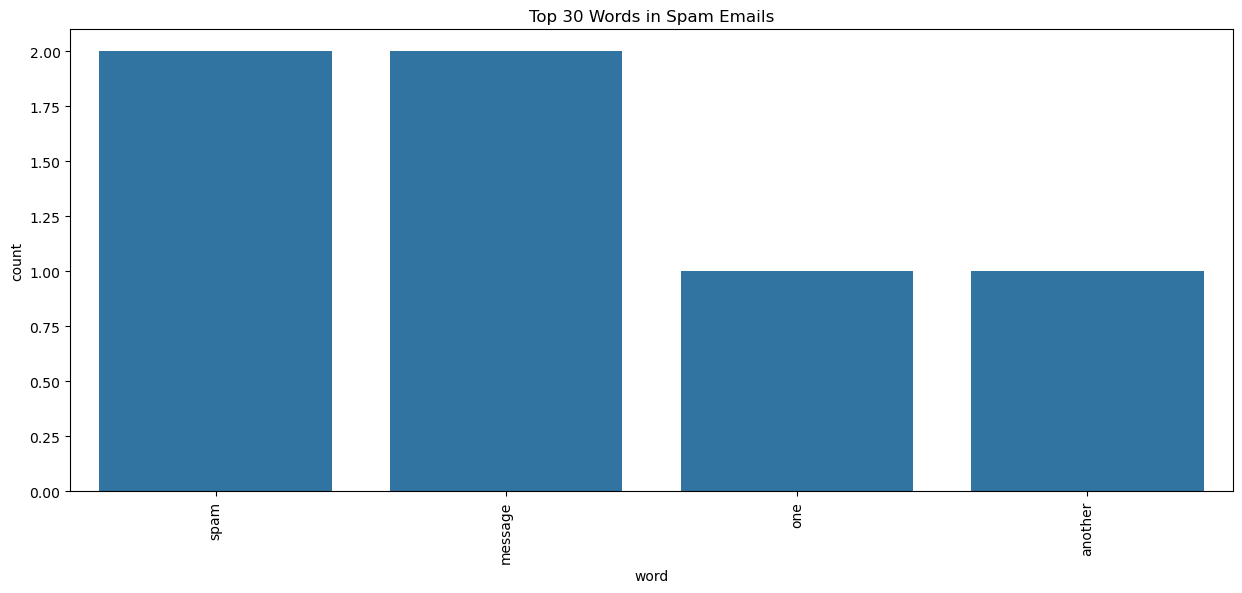

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming spam_corpus is already created as shown in your previous message
# spam_corpus = [...]

# Generate the word counts
word_counts = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the word counts
word_count_df = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plot the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Words in Spam Emails')
plt.show()


In [218]:
ham_corpus = []
for msg in df[df['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [219]:
len(ham_corpus)

5

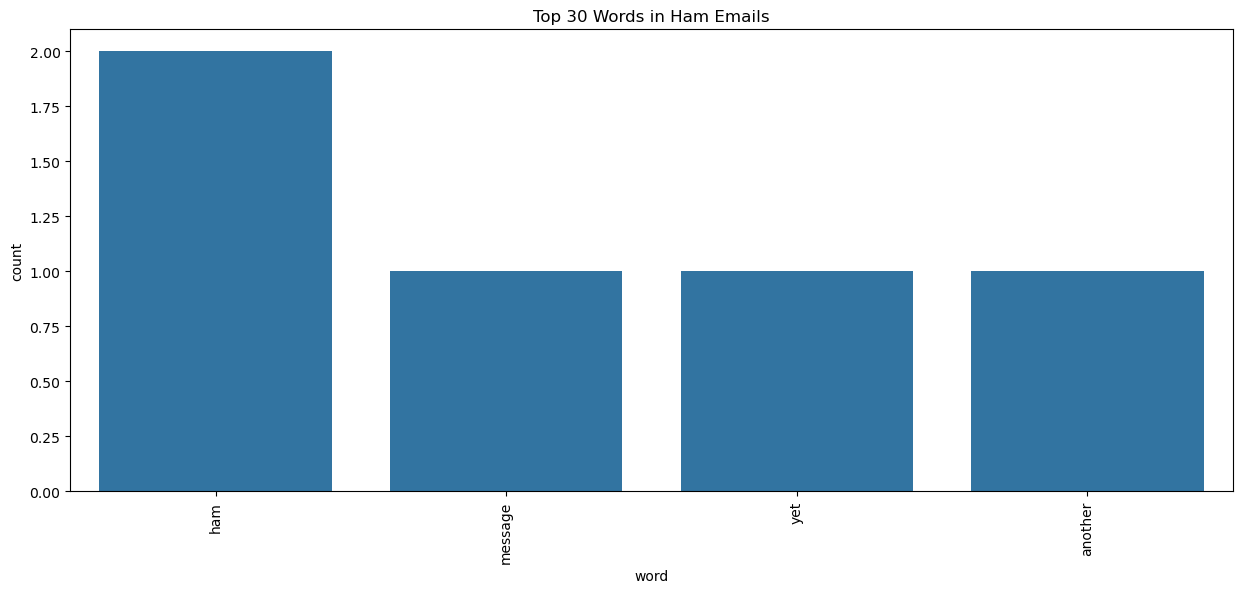

In [221]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ham_corpus is already created
# ham_corpus = [...]

# Generate the word counts
word_counts = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the word counts
word_count_df = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plot the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Words in Ham Emails')
plt.show()


In [222]:
# Text Vectorization
# using Bag of Words
df.head()

,Category,transformed_text
0,1,spam message one
1,0,ham message
2,1,another spam message
3,0,yet another ham


## 4. Model Building

In [223]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [224]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [225]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [226]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [227]:
X.shape

(4, 6)

In [229]:
y = df['Category'].values

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [232]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [233]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [234]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.0
[[0 0]
 [1 0]]
0.0


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [235]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.0
[[0 0]
 [1 0]]
0.0


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [236]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

1.0
[[1]]
1.0


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [237]:
# tfidf --> MNB

In [239]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 4.8 MB/s eta 0:00:26
    --------------------------------------- 2.4/124.9 MB 5.0 MB/s eta 0:00:25
   - -------------------------------------- 3.7/124.9 MB 5.5 MB/s eta 0:00:23
   - -------------------------------------- 5.2/124.9 MB 5.8 MB/s eta 0:00:21
   -- ------------------------------------- 6.3/124.9 MB 5.7 MB/s eta 0:00:21
   -- ------------------------------------- 7.6/124.9 MB 5.9 MB/s eta 0:00:20
   -- ------------------------------------- 8.9/124.9 MB 5.9 MB/s eta 0:00:20
   --- ------------------------------------ 10.2/124.9 MB 6.0 MB/s eta 0:00:20
   --- ------------------------------------ 11.5/124.9 MB 6.0 MB/s eta 0:00:20
   ---- ----------------------------------- 12.8/124.9 MB 6.1 MB/s eta 0:00:19
   ---- ----------------------------------- 14.4/124.9 MB 6.2 MB/s eta 0:00

In [240]:
from xgboost import XGBClassifier


In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [242]:
from sklearn.model_selection import train_test_split

# Assuming your features are in X and labels are in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [245]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

NameError: name 'xgb' is not defined

In [246]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [247]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the results
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

# Example usage with your SVC classifier
train_classifier(svc, X_train, y_train, X_test, y_test)


Classifier: SVC
  Accuracy: 0.0000
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [248]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Print the results
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    
    # Return the metrics
    return accuracy, precision


In [277]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [278]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [279]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [280]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [281]:
from sklearn.ensemble import StackingClassifier

In [282]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [283]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))